# Naive Bayes classifier : Salary data

In [154]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sn 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB,CategoricalNB,ComplementNB
from sklearn.model_selection import learning_curve
import scikitplot as skplt
import scikitplot.plotters as sp

In [54]:
df_train = pd.read_csv(r"C:\Users\Adith\Desktop\Data Science_Excel R\home assignments\Naive Bayes\SalaryData_train.csv")
df_test = pd.read_csv(r"C:\Users\Adith\Desktop\Data Science_Excel R\home assignments\Naive Bayes\SalaryData_test.csv")

In [55]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [56]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [57]:
#merging our train and test data 
df = df_train.append(df_test)
df.reset_index(inplace=True,drop=True)
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [58]:
#checking with info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [59]:
#checking if we have any duplicate records 
(df[df.duplicated()])

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
45210,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
45213,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
45214,25,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K


In [60]:
#dropping our duplicate records
df2 = df.drop_duplicates()

In [61]:
df2.shape

(39239, 14)

In [62]:
#checking  again if we have any duplicate records 
(df2[df2.duplicated()])

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [63]:
#cheking with descriptive statistics of our data 
df2.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000
mean,39.309412,10.136293,1253.346186,101.207727,41.206121
std,13.298159,2.637228,7994.096625,431.309171,12.458178
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [64]:
#checking if we have any null values 
print(df.isna().sum())

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64


In [65]:
#checking for salary the distribution of data
df.Salary.value_counts()

 <=50K    34013
 >50K     11208
Name: Salary, dtype: int64

since we see our dependent variable is not balanced we need to treat before fitting into our algorithm

In [66]:
# find categorical variables

categorical = [var for var in df2.columns if df2[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [67]:
#distribution of our independent data 
for var in categorical:
    print(df2[var].value_counts())

 Private             27716
 Self-emp-not-inc     3669
 Local-gov            2975
 State-gov            1892
 Self-emp-inc         1595
 Federal-gov          1371
 Without-pay            21
Name: workclass, dtype: int64
 HS-grad         12003
 Some-college     8456
 Bachelors        6522
 Masters          2357
 Assoc-voc        1859
 Assoc-acdm       1470
 11th             1422
 10th             1136
 7th-8th           801
 Prof-school       764
 9th               658
 12th              540
 Doctorate         526
 5th-6th           438
 1st-4th           217
 Preschool          70
Name: education, dtype: int64
 Married-civ-spouse       17947
 Never-married            12168
 Divorced                  5885
 Separated                 1394
 Widowed                   1261
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64
 Prof-specialty       5516
 Exec-managerial      5311
 Adm-clerical         4742
 Sales                4671
 Craft-repair    

## Visualizations 

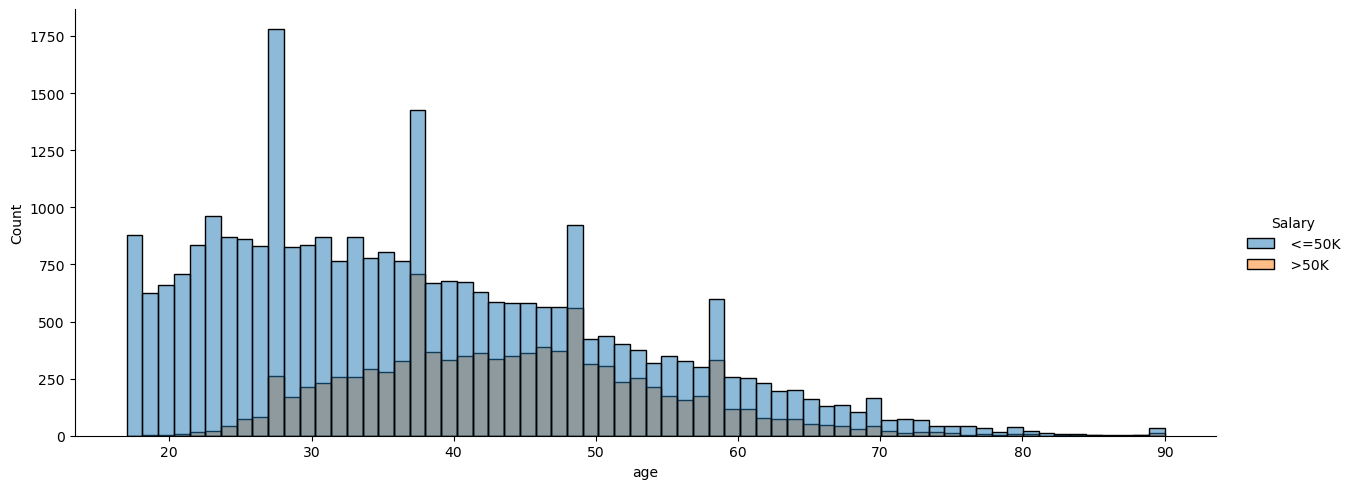

In [68]:
#checking the distribution of salary compared to age
sn.displot(df2,x='age',hue= 'Salary',aspect=20/8)

we observe that age below 20 years dont possess salary above 50K but we also know that our salary set is imbalanced to make a prediction or concluion

<AxesSubplot:ylabel='education'>

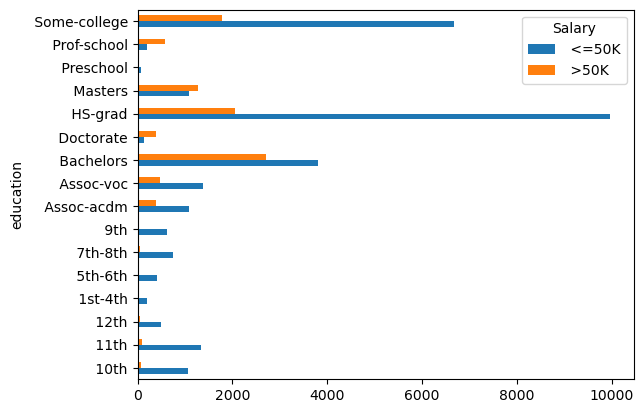

In [69]:
#checking the salary distribution according education
pd.crosstab(df2.education,df2.Salary).plot(kind = 'barh')


We observe that education level with masters degree have salary above 50K and the percentage of having masters earning less than 50K is lower,the lowest salary earned is by the education level of only preschool

<AxesSubplot:ylabel='occupation'>

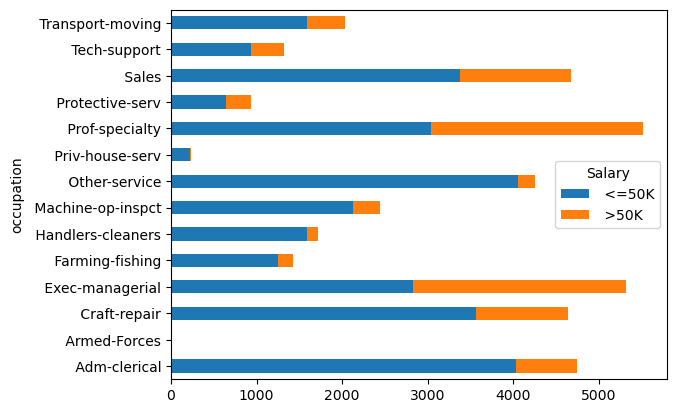

In [70]:
#checking with occupation and salary as salary is affected by occupation and roles
pd.crosstab(df2.occupation,df2.Salary).plot(kind = 'barh',stacked=True)


We can observe that roles like Executive Managerial and Speciality professors have the percentage margin of salary above 50K compared to other job roles,the lowest salary is earned by Armed forces

<AxesSubplot:xlabel='workclass'>

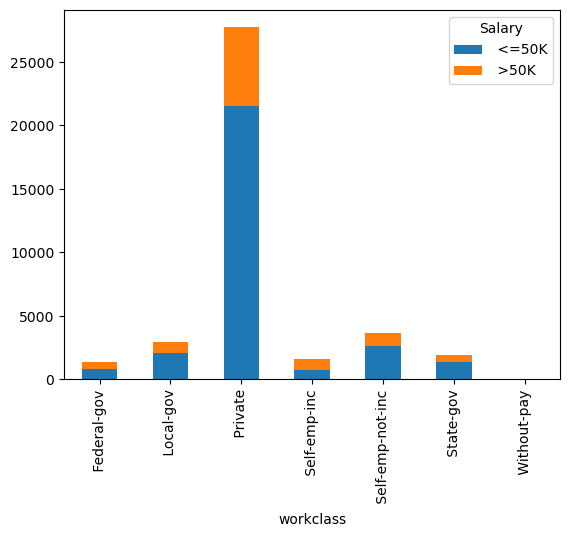

In [71]:
pd.crosstab(df2.workclass,df2.Salary).plot(kind = 'bar',stacked=True)

its very evidently visible that people working in private sectors have salary above 50K compared to marginal percentage of salary to other sectors

<AxesSubplot:xlabel='sex'>

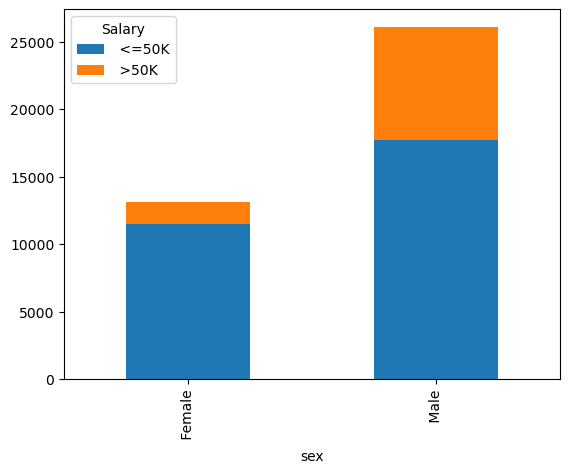

In [52]:
#checking salary distribution with gender 
pd.crosstab(df2.sex,df2.Salary).plot(kind = 'bar',stacked=True)

Here we see that ratio of males to females who earn salary greater than 50K is higher

<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

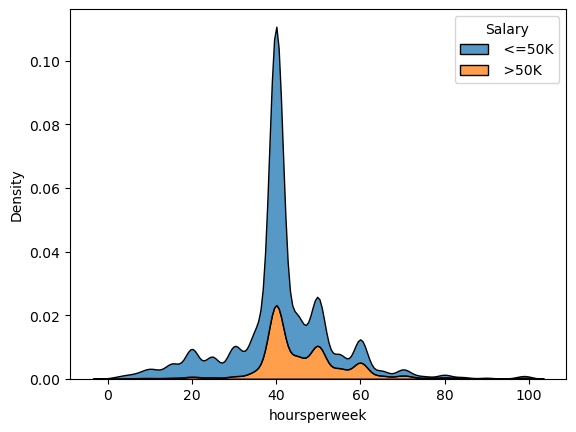

In [49]:
sn.kdeplot(data= df2,x='hoursperweek',hue='Salary',multiple='stack')

We observe that when it comes to hours per week people approximately working between 40-60 hours have higher density of salary greater than 50K

In [50]:
#setting label encoder for all categorical values 
df3 = df2.copy()
cols = ['workclass','education','maritalstatus','occupation','relationship',
      'race','sex','native','Salary']
df3[cols] = df2[cols].apply(LabelEncoder().fit_transform)

df3.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [73]:
#checking with correlation matrix
df3.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.079642,0.001807,0.030211,-0.233279,-0.004676,-0.230643,0.044616,0.068483,0.075495,0.049876,0.066927,0.012129,0.214285
workclass,0.079642,1.000000,0.022333,0.041859,-0.031786,0.016217,-0.070247,0.059339,0.075331,0.031985,0.002649,0.047542,0.010469,0.015598
education,0.001807,0.022333,1.000000,0.366443,-0.043411,-0.020636,-0.010764,0.003913,-0.029864,0.035072,0.024082,0.060431,0.075014,0.094952
educationno,0.030211,0.041859,0.366443,1.000000,-0.069475,0.087334,-0.085939,0.033594,0.006596,0.129552,0.082594,0.136030,0.097527,0.329569
maritalstatus,-0.233279,-0.031786,-0.043411,-0.069475,1.000000,0.006666,0.155762,-0.075430,-0.109154,-0.042309,-0.033607,-0.167011,-0.026461,-0.181626
occupation,-0.004676,0.016217,-0.020636,0.087334,0.006666,1.000000,-0.061367,0.008746,0.061054,0.016952,0.010978,0.020983,0.004230,0.049738
relationship,-0.230643,-0.070247,-0.010764,-0.085939,0.155762,-0.061367,1.000000,-0.113604,-0.584810,-0.062712,-0.066390,-0.247737,-0.001036,-0.244911
race,0.044616,0.059339,0.003913,0.033594,-0.075430,0.008746,-0.113604,1.000000,0.085235,0.021099,0.031794,0.053968,0.116142,0.078779
sex,0.068483,0.075331,-0.029864,0.006596,-0.109154,0.061054,-0.584810,0.085235,1.000000,0.052882,0.053687,0.226747,-0.010639,0.212912
capitalgain,0.075495,0.031985,0.035072,0.129552,-0.042309,0.016952,-0.062712,0.021099,0.052882,1.000000,-0.036791,0.082977,0.012924,0.231529


<AxesSubplot:>

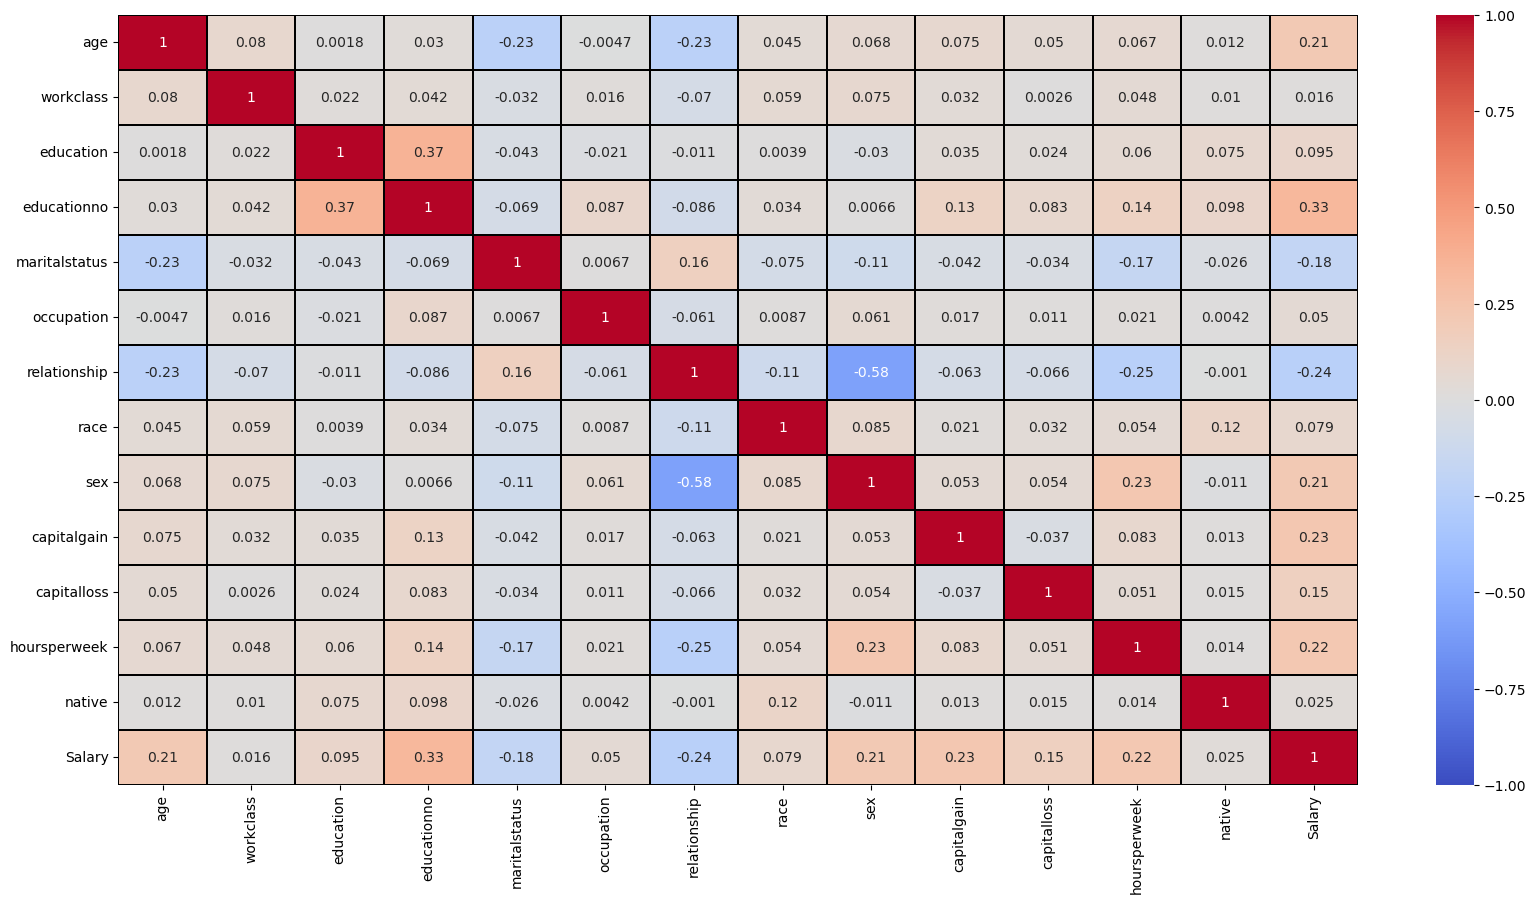

In [74]:
#plotting the maximum correlation with plot 
corr = df3.corr()
top_features = corr.index
plt.figure(figsize=(20,10))
sn.heatmap(df3[top_features].corr(),annot = True,linecolor='black',cbar='blue',linewidths=0.2,cmap='coolwarm',
          vmax=1,vmin=-1)

We can observe that in correlation with our dependent variable age and education has a linear relationship

<AxesSubplot:>

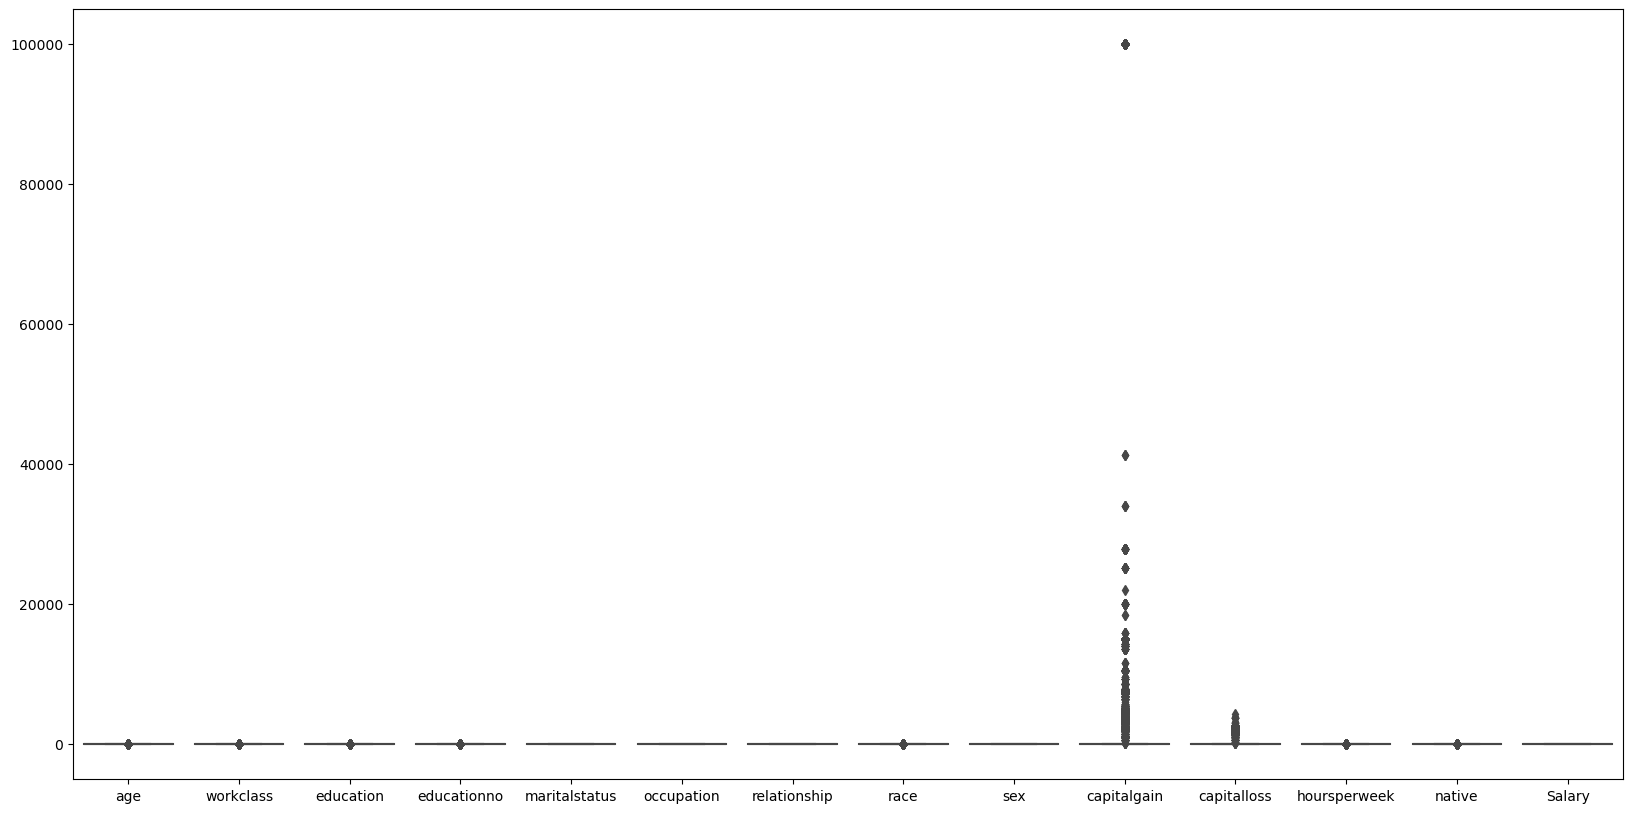

In [75]:
#checking for outliers in the given dataset
plt.figure(figsize=(20,10))
sn.boxplot(data=df3)

We observe that we have an outlier in Capital Gain and we have to treat them as we know Naive Bayes is sensitive to outliers

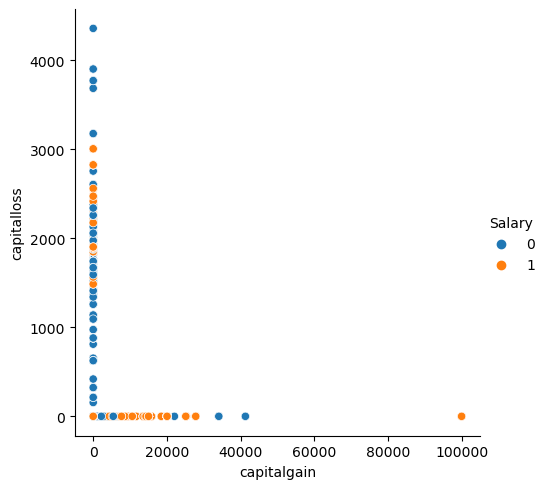

In [76]:
#checking relation of capital loss and capital gain in comparison to salary
sn.relplot(data=df3,x='capitalgain',y='capitalloss',hue='Salary')


We understand from relation plot that most of the people have salary less than 50K because of higher range of capital loss in the income 

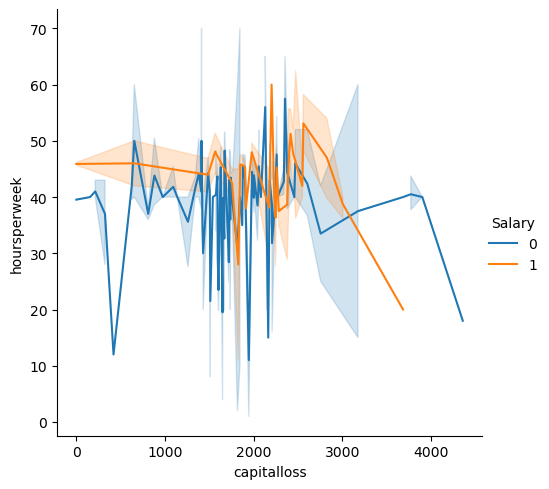

In [77]:
#checking relation of hoursperweek and capital loss in comparison to salary
sn.relplot(data=df3,x='capitalloss',y='hoursperweek',hue='Salary',kind='line')


In the line chart we observe that people with working hours above 40 have less dip in capital loss compared to people working nearly 40 and lower,people working greater than 40 hours but still have dips in capital loss might be because of the workclass or their occupation

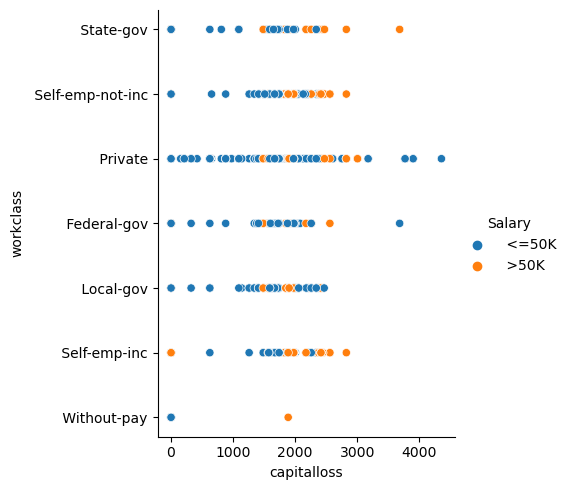

In [78]:
#checking relation of workclass and capital loss in comparison to salary
sn.relplot(data=df2,x='capitalloss',y='workclass',hue='Salary')


When it comes to workclass we observe that people with salary less than 50K have higher capital loss compared to those higher than 50K, this indicates that people with higher salary have lesser rate  of distribution of income or investment

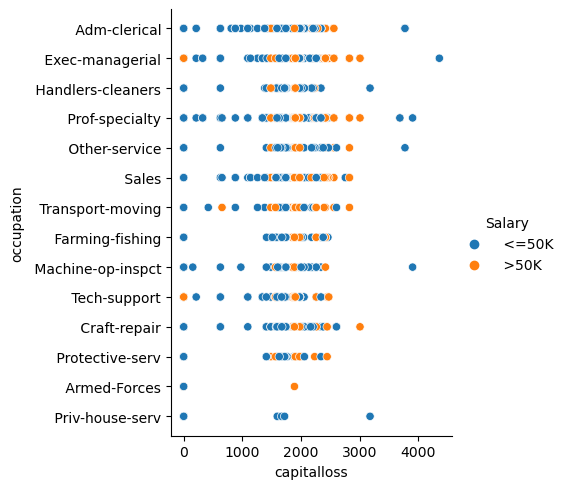

In [79]:
#checking relation of occupation and capital loss in comparison to salary
sn.relplot(data=df2,x='capitalloss',y='occupation',hue='Salary')


The reason is same as the above we can see that dip in capital loss is because, the people with salary lower than 50K are having higher rate of investment or distribution when compared to people with Salary above 50K

We have done all necessary observations and understood distribution of salary based on relational methods,now lets proceed with our EDA part

## EDA - Exploratory Data Analysis

<AxesSubplot:xlabel='capitalgain'>

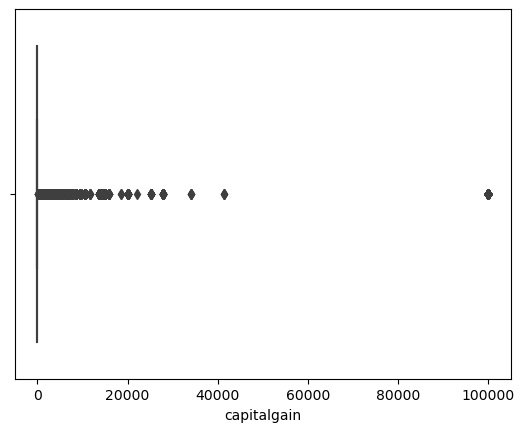

In [80]:
#checking the outliers in the capital gain 
sn.boxplot(df3['capitalgain'])

In [81]:
#locating our upper and lower limit
ul = df3['capitalgain'].quantile(0.99)
ll = df3['capitalgain'].quantile(0.01)
print(ul,ll)

15024.0 0.0


In [82]:
#trimming the outliers 
df4 = df3[(df3['capitalgain']<=15024)&(df3['capitalgain']>0)]

<AxesSubplot:xlabel='capitalgain'>

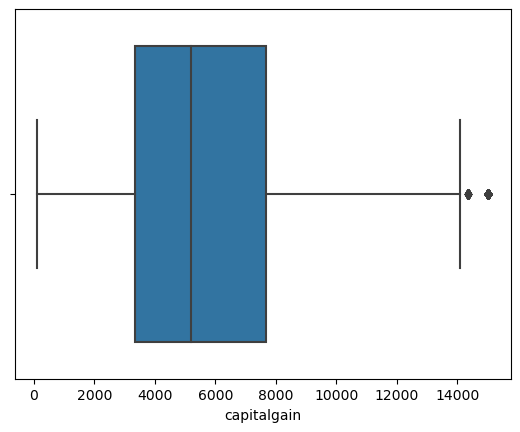

In [83]:
#plotting after trimming the outliers
sn.boxplot(df4['capitalgain'])

In [84]:
#capping or winsorization method 
df4['capitalgain'] = np.where(df4['capitalgain']>=ul,
                      ul,
                      np.where(df4['capitalgain']<=ll,
                              ll,
                              df4['capitalgain']))

<AxesSubplot:xlabel='capitalgain'>

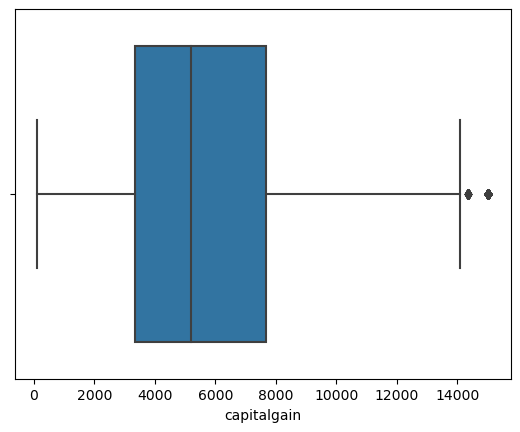

In [85]:
#plotting after capping
sn.boxplot(df4['capitalgain'])

<AxesSubplot:>

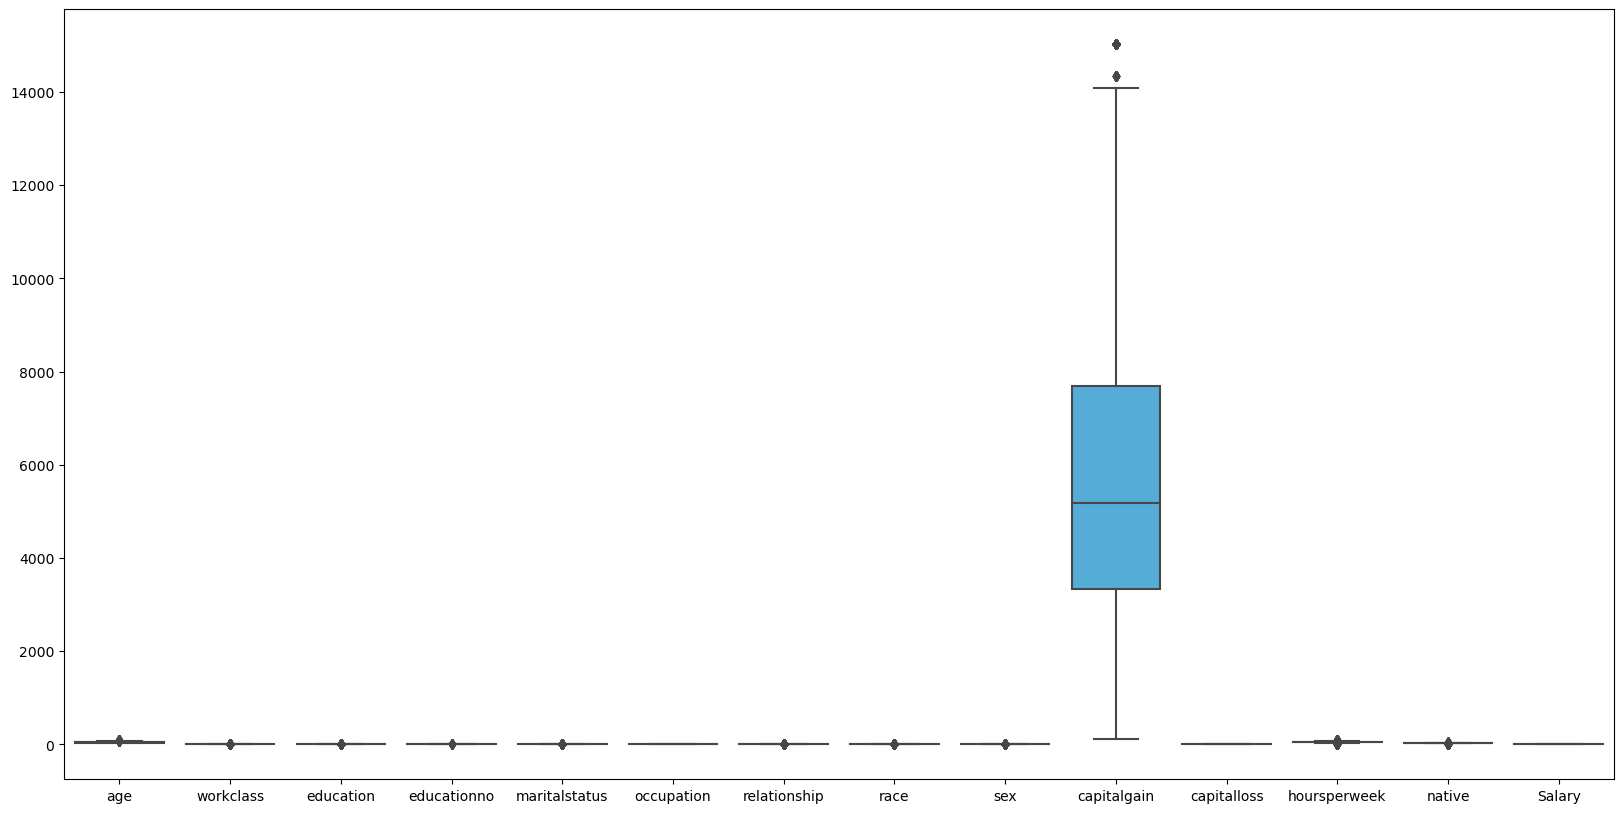

In [86]:
#checking for any outliers in the given dataset
plt.figure(figsize=(20,10))
sn.boxplot(data=df4)

since we have treated the outliers and have a minimal distance between outliers we can proceed further with feature engineering and feature extraction

## Feature Engineering and Feature Selection

In [87]:
df4.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174.0,0,40,37,0
8,31,2,12,14,4,9,1,4,0,14084.0,0,50,37,1
9,42,2,9,13,2,3,0,4,1,5178.0,0,40,37,1
55,30,2,11,9,2,6,0,4,1,5013.0,0,40,37,0
56,30,2,9,13,2,11,0,4,1,2407.0,0,40,37,0


In [88]:
df4.dtypes

age                int64
workclass          int32
education          int32
educationno        int64
maritalstatus      int32
occupation         int32
relationship       int32
race               int32
sex                int32
capitalgain      float64
capitalloss        int64
hoursperweek       int64
native             int32
Salary             int32
dtype: object

since all of our features in our desired format we dont need to convert any feature 

In [89]:
#chi square analysis: splitting our independent and dependent variables
X = df4.iloc[:,0:13]
y = df4.iloc[:,13]
print(X.shape,y.shape)

(3390, 13) (3390,)


In [90]:
#fitting our model on chi test
best_feat = SelectKBest(score_func=chi2,k=10)
feat_sel = best_feat.fit(X,y)

In [91]:
#summarise scores
scores = feat_sel.scores_

features = feat_sel.transform(X)

In [92]:
#fitting our scores in Dataframe
score_df = pd.DataFrame(list(zip(scores,X.columns)),
                       columns =['score','Feature'])
score_df.sort_values(by="score",ascending=False,inplace=True)
score_df

,score,Feature
9,4.163478e+06,capitalgain
11,5.088888e+02,hoursperweek
6,3.783627e+02,relationship
3,2.812659e+02,educationno
0,2.022281e+02,age
4,8.162895e+01,maritalstatus
8,3.297121e+01,sex
5,2.855498e+01,occupation
2,2.247681e+01,education
12,2.864509e+00,native


In [93]:
#plotting feature  selection by mutual importances
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [94]:
print(model.feature_importances_)

[0.08017659 0.02937439 0.03107701 0.06468274 0.05459352 0.04559652
 0.07381679 0.01330634 0.02505727 0.51345129 0.         0.05862929
 0.01023825]


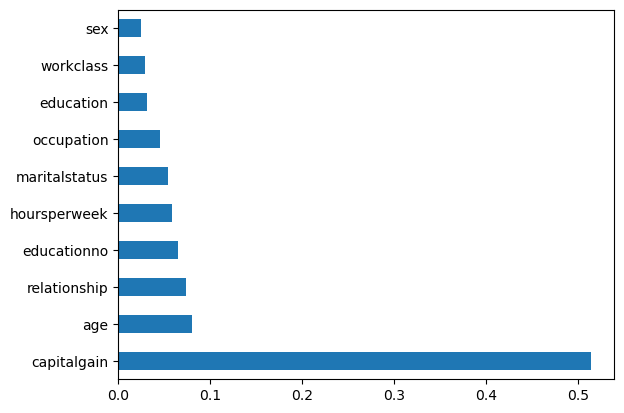

In [95]:
#selection for our top 10 features
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [96]:
#selecting our top features after selection 
df5 = df4[['age','relationship','educationno','capitalgain','maritalstatus','hoursperweek','occupation','workclass',
          'sex','Salary']]

In [97]:
df5.head()

,age,relationship,educationno,capitalgain,maritalstatus,hoursperweek,occupation,workclass,sex,Salary
0,39,1,13,2174.0,4,40,0,5,1,0
8,31,1,14,14084.0,4,50,9,2,0,1
9,42,0,13,5178.0,2,40,3,2,1,1
55,30,0,9,5013.0,2,40,6,2,1,0
56,30,0,13,2407.0,2,40,11,2,1,0


In [98]:
#checking the balance of our dependent variable 
df5.Salary.value_counts()

1    1987
0    1403
Name: Salary, dtype: int64

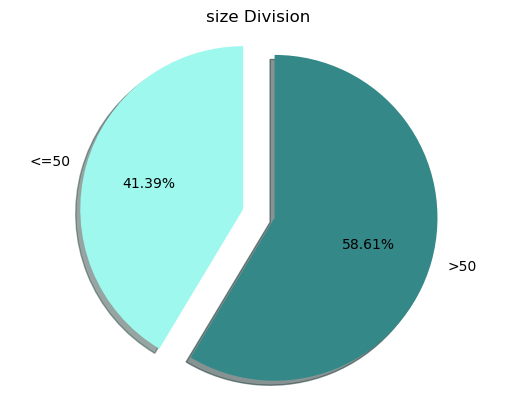

In [99]:
#plotting pie chart to understand well the balance of data
labels =['<=50','>50']
colors =['#9EF8EE','#348888']
sizes = [1403,1987]
plt.pie(sizes,labels=labels,colors=colors,startangle=90,shadow=True,
       explode= (0.1,0.1),autopct ='%1.2f%%')
plt.title('size Division')
plt.axis('equal')
plt.show()

Since the difference percentage of balance of our data is minimal so we dont need to apply SMote techniques 

## Naive Bayes Algorithm

In [100]:
#splitting our extracted data into train test split
X2 = df5.iloc[:,0:9]
y2 = df5.iloc[:,9]
print(X2.shape,y2.shape)

(3390, 9) (3390,)


In [101]:
#fitting our train and test split
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.4)

In [102]:
#checking our balance of data after train test split
print('Training Features Shape:', X2_train.shape)
print('Training Labels Shape:', X2_test.shape)
print('Testing Features Shape:', y2_train.shape)
print('Testing Labels Shape:', y2_test.shape)

Training Features Shape: (2034, 9)
Training Labels Shape: (1356, 9)
Testing Features Shape: (2034,)
Testing Labels Shape: (1356,)


## Hyperparameter tuning for naive bayes 

Gaussian NB

In [125]:
#fitting our parameters for gaussian Naive bayes
params = {'priors':[None,[0.1,0.01,0.001]],
         'var_smoothing':[1e-9,1e-6,1e-12]
         }

In [126]:
#fitting our model to locate parameters
gauss_nb_grid = GridSearchCV(GaussianNB(),param_grid=params,n_jobs=2,cv=5,verbose=10)
gauss_nb_grid.fit(X2_train,y2_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=2,
             param_grid={'priors': [None, [0.1, 0.01, 0.001]],
                         'var_smoothing': [1e-09, 1e-06, 1e-12]},
             verbose=10)

In [128]:
#printing the optimal parameters 
print('Best Accuracy Through Grid Search : {:.3f}'.format(gauss_nb_grid.best_score_))
print('Best Parameters : {}\n'.format(gauss_nb_grid.best_params_))

Best Accuracy Through Grid Search : 0.873
Best Parameters : {'priors': None, 'var_smoothing': 1e-09}



In [129]:
#predictions and report with our best parameters 
preds_gaussian = gauss_nb_grid.best_estimator_.predict(X2_test)
preds_gaussian_train = gauss_nb_grid.best_estimator_.predict(X2_train)

print("Test Accuracy Score : {:.3f}".format(accuracy_score(y2_test, preds_gaussian)))
print("Train Accuracy Score : {:.3f}".format(accuracy_score(y2_train, preds_gaussian_train)))
print("\nClassification Report :")
print(classification_report(y2_test, preds_gaussian))

Test Accuracy Score : 0.863
Train Accuracy Score : 0.872

Classification Report :
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       569
           1       0.88      0.89      0.88       787

    accuracy                           0.86      1356
   macro avg       0.86      0.86      0.86      1356
weighted avg       0.86      0.86      0.86      1356



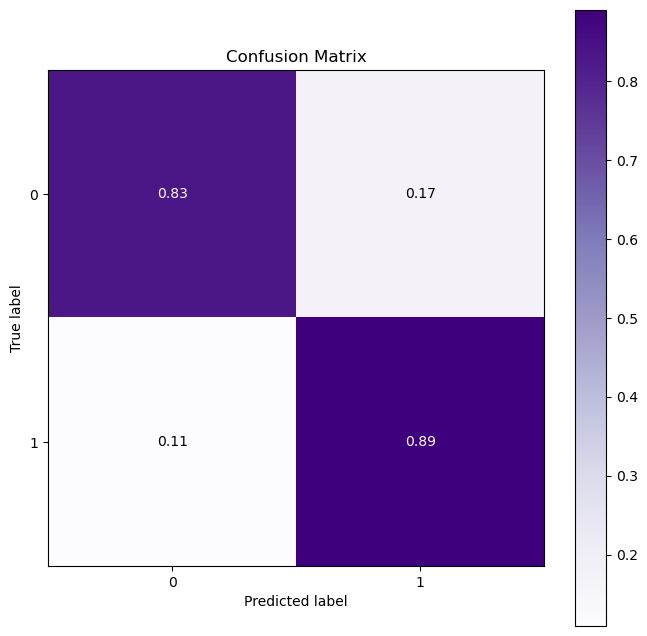

In [152]:
#plotting confusion matrix with best estimator that we found using grid search.
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
skplt.metrics.plot_confusion_matrix(y2_test, preds_gaussian,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax
                                    );

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

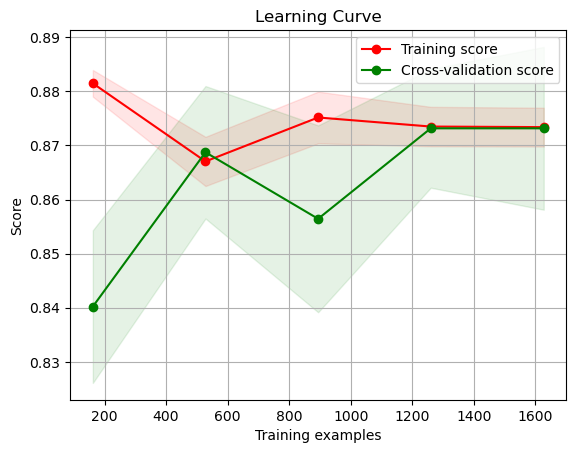

In [155]:
#plotting using learning curves for gaussian naive bayes  
sp.plot_learning_curve(gauss_nb_grid,X2_train,y2_train,scoring='accuracy')

so We can make a conclusion that as the range of samples are increasing the accuracy is also increasing with variance constant at 1200 samples 

Bernoulli Naive Bayes

In [156]:
#fitting our parameters 
params_ber = {'alpha':[0.01,0.1,1.0,10.0],
             'fit_prior':[True,False],
             'class_prior':[None,[0.1]],
             'binarize':[None,8.5,10.0]
             }

In [157]:
#fitting our model to locate parameters
ber_nb_grid = GridSearchCV(BernoulliNB(),param_grid=params_ber,n_jobs=2,cv=5,verbose=10)
ber_nb_grid.fit(X2_train,y2_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=2,
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0],
                         'binarize': [None, 8.5, 10.0],
                         'class_prior': [None, [0.1]],
                         'fit_prior': [True, False]},
             verbose=10)

In [159]:
#printing the optimal parameters 
print('Best Accuracy Through Grid Search : {:.3f}'.format(ber_nb_grid.best_score_))
print('Best Parameters : {}\n'.format(ber_nb_grid.best_params_))

Best Accuracy Through Grid Search : 0.652
Best Parameters : {'alpha': 0.01, 'binarize': 10.0, 'class_prior': None, 'fit_prior': False}



In [163]:
#predictions and report with our best parameters 
preds_bernoulli = ber_nb_grid.best_estimator_.predict(X2_test)
preds_bernoulli_train = ber_nb_grid.best_estimator_.predict(X2_train)

print("Test Accuracy Score : {:.3f}".format(accuracy_score(y2_test, preds_bernoulli)))
print("Train Accuracy Score : {:.3f}".format(accuracy_score(y2_train, preds_bernoulli_train)))
print("\nClassification Report :")
print(classification_report(y2_test, preds_bernoulli))

Test Accuracy Score : 0.661
Train Accuracy Score : 0.652

Classification Report :
              precision    recall  f1-score   support

           0       0.58      0.73      0.64       569
           1       0.76      0.61      0.68       787

    accuracy                           0.66      1356
   macro avg       0.67      0.67      0.66      1356
weighted avg       0.68      0.66      0.66      1356



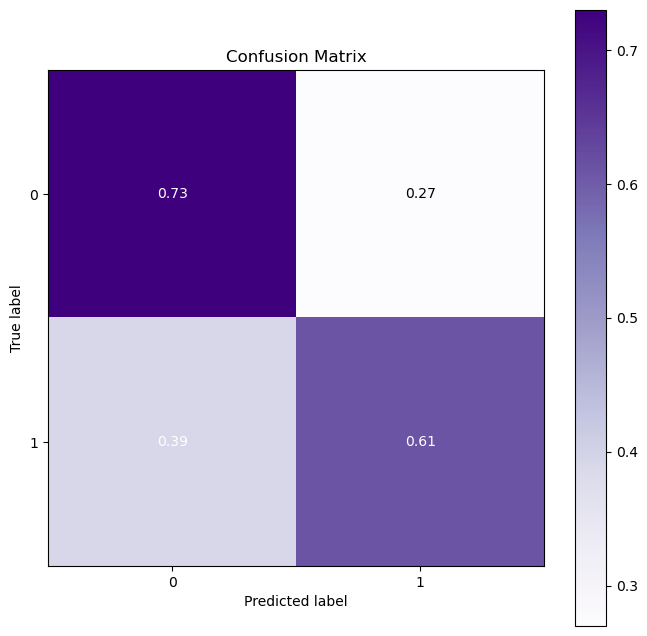

In [164]:
#plotting confusion matrix with best estimator that we found using grid search.
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
skplt.metrics.plot_confusion_matrix(y2_test, preds_bernoulli,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax
                                    );

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

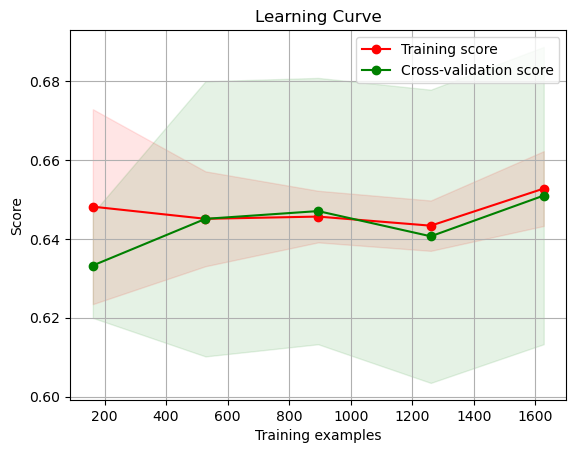

In [165]:
#plotting using learning curves for gaussian naive bayes  
sp.plot_learning_curve(ber_nb_grid,X2_train,y2_train,scoring='accuracy')

Using bernoulli Naive bayes we observe that our accuracy has dipped down and also we see variance in the validation score 


Complement Naive Bayes

In [168]:
#fitting our parameters 
params_com = {'alpha': [0.01, 0.1, 1.0, 10.0, ],
          'fit_prior': [True, False],
          'norm': [True, False],
          'class_prior': [None, [0.1,]]
         }

In [169]:
#fitting our model to locate parameters
com_nb_grid = GridSearchCV(ComplementNB(),param_grid=params_com,n_jobs=2,cv=5,verbose=10)
com_nb_grid.fit(X2_train,y2_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=ComplementNB(), n_jobs=2,
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0],
                         'class_prior': [None, [0.1]],
                         'fit_prior': [True, False], 'norm': [True, False]},
             verbose=10)

In [170]:
#printing the optimal parameters 
print('Best Accuracy Through Grid Search : {:.3f}'.format(com_nb_grid.best_score_))
print('Best Parameters : {}\n'.format(com_nb_grid.best_params_))

Best Accuracy Through Grid Search : 0.837
Best Parameters : {'alpha': 0.01, 'class_prior': None, 'fit_prior': True, 'norm': False}



In [171]:
#predictions and report with our best parameters 
preds_complement = com_nb_grid.best_estimator_.predict(X2_test)
preds_complement_train = com_nb_grid.best_estimator_.predict(X2_train)

print("Test Accuracy Score : {:.3f}".format(accuracy_score(y2_test, preds_complement)))
print("Train Accuracy Score : {:.3f}".format(accuracy_score(y2_train, preds_complement_train)))
print("\nClassification Report :")
print(classification_report(y2_test, preds_complement))

Test Accuracy Score : 0.843
Train Accuracy Score : 0.838

Classification Report :
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       569
           1       0.91      0.81      0.86       787

    accuracy                           0.84      1356
   macro avg       0.84      0.85      0.84      1356
weighted avg       0.85      0.84      0.84      1356



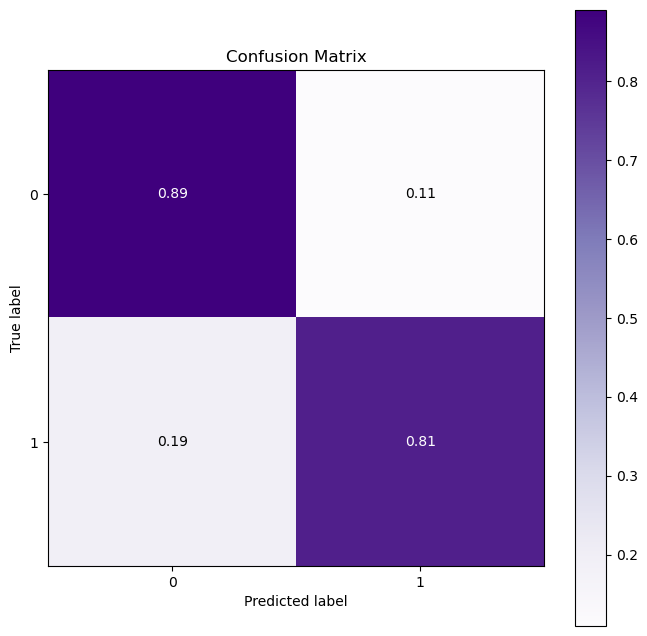

In [172]:
#plotting confusion matrix with best estimator that we found using grid search.
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
skplt.metrics.plot_confusion_matrix(y2_test, preds_complement,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax
                                    );

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

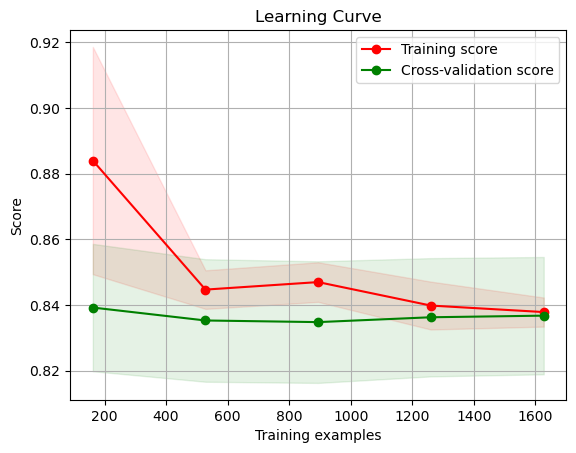

In [173]:
#plotting using learning curves for gaussian naive bayes  
sp.plot_learning_curve(com_nb_grid,X2_train,y2_train,scoring='accuracy')

We can observe that we are getting good accuracy but our precision is low when compared to gaussian naive bayes, and its also serves less variance 

MultiNomial Naive Bayes

In [175]:
#fitting our parameters 
params_mul = {'alpha': [0.01, 0.1, 1.0, 10.0, ],
          'fit_prior': [True, False],
          
          'class_prior': [None, [0.1]]
         }

In [176]:
#fitting our model to locate parameters
mul_nb_grid = GridSearchCV(MultinomialNB(),param_grid=params_mul,n_jobs=2,cv=5,verbose=10)
mul_nb_grid.fit(X2_train,y2_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=2,
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0],
                         'class_prior': [None, [0.1]],
                         'fit_prior': [True, False]},
             verbose=10)

In [177]:
#printing the optimal parameters 
print('Best Accuracy Through Grid Search : {:.3f}'.format(mul_nb_grid.best_score_))
print('Best Parameters : {}\n'.format(mul_nb_grid.best_params_))

Best Accuracy Through Grid Search : 0.837
Best Parameters : {'alpha': 0.01, 'class_prior': None, 'fit_prior': False}



In [178]:
#predictions and report with our best parameters 
preds_multinomial = mul_nb_grid.best_estimator_.predict(X2_test)
preds_multinomial_train = mul_nb_grid.best_estimator_.predict(X2_train)

print("Test Accuracy Score : {:.3f}".format(accuracy_score(y2_test, preds_multinomial)))
print("Train Accuracy Score : {:.3f}".format(accuracy_score(y2_train, preds_multinomial_train)))
print("\nClassification Report :")
print(classification_report(y2_test, preds_multinomial))

Test Accuracy Score : 0.843
Train Accuracy Score : 0.838

Classification Report :
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       569
           1       0.91      0.81      0.86       787

    accuracy                           0.84      1356
   macro avg       0.84      0.85      0.84      1356
weighted avg       0.85      0.84      0.84      1356



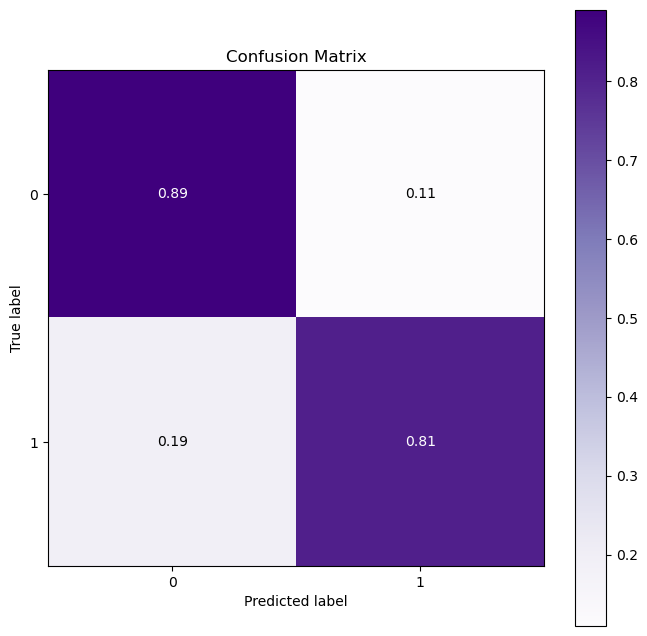

In [179]:
#plotting confusion matrix with best estimator that we found using grid search.
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
skplt.metrics.plot_confusion_matrix(y2_test, preds_multinomial,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax
                                    );

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

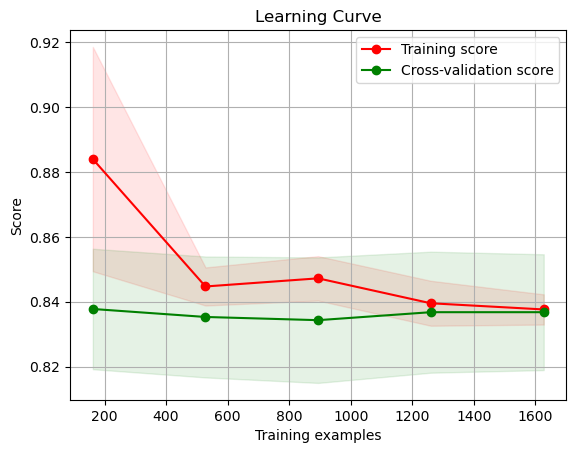

In [181]:
#plotting using learning curves for gaussian naive bayes  
sp.plot_learning_curve(mul_nb_grid,X2_train,y2_train,scoring='accuracy')

We observe that we having lower precision compared to gaussian with a good accuracy score and less variance between the train and test score or accuracy

Categorical Naive Bayes 

In [207]:
#fitting our parameters 
params_cat = {'alpha': [0.01, 0.1, 1.0, 10.0 ],
          'fit_prior': [True, False],
         'min_categories':[2,4,6],
          
          'class_prior': [None, [0.1]],
         }

In [208]:
#fitting our model to locate parameters
cat_nb_grid = GridSearchCV(CategoricalNB(),param_grid=params_cat,n_jobs=2,cv=5,verbose=10)
cat_nb_grid.fit(X2_train,y2_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=CategoricalNB(), n_jobs=2,
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0],
                         'class_prior': [None, [0.1]],
                         'fit_prior': [True, False],
                         'min_categories': [2, 4, 6]},
             verbose=10)

In [212]:
#printing the optimal parameters 
print('Best Parameters : {}\n'.format(cat_nb_grid.best_params_))

Best Parameters : {'alpha': 0.01, 'class_prior': None, 'fit_prior': True, 'min_categories': 2}



In [211]:
#predictions and report with our best parameters 
preds_categorical = cat_nb_grid.best_estimator_.predict(X2_test)
preds_categorical_train = cat_nb_grid.best_estimator_.predict(X2_train)

print("Test Accuracy Score : {:.3f}".format(accuracy_score(y2_test, preds_categorical)))
print("Train Accuracy Score : {:.3f}".format(accuracy_score(y2_train, preds_categorical_train)))
print("\nClassification Report :")
print(classification_report(y2_test, preds_categorical))

Test Accuracy Score : 0.993
Train Accuracy Score : 0.992

Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       569
           1       0.99      1.00      0.99       787

    accuracy                           0.99      1356
   macro avg       0.99      0.99      0.99      1356
weighted avg       0.99      0.99      0.99      1356



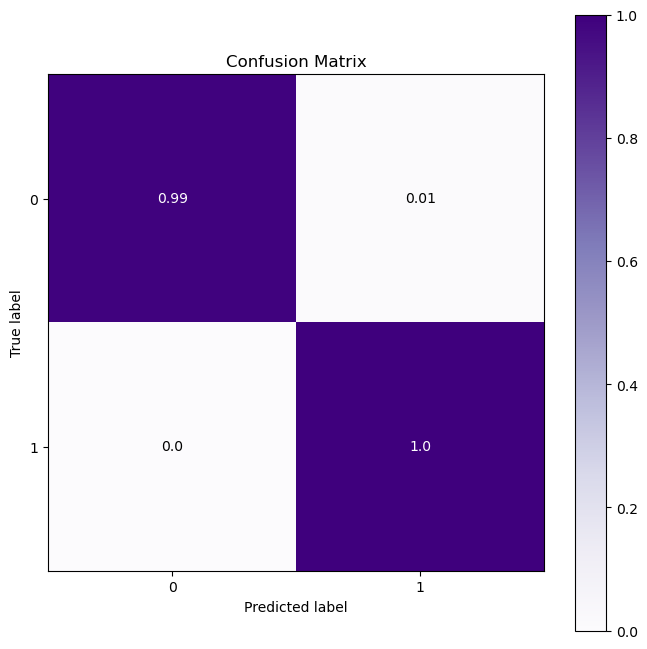

In [213]:
#plotting confusion matrix with best estimator that we found using grid search.
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
skplt.metrics.plot_confusion_matrix(y2_test, preds_categorical,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax
                                    );

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

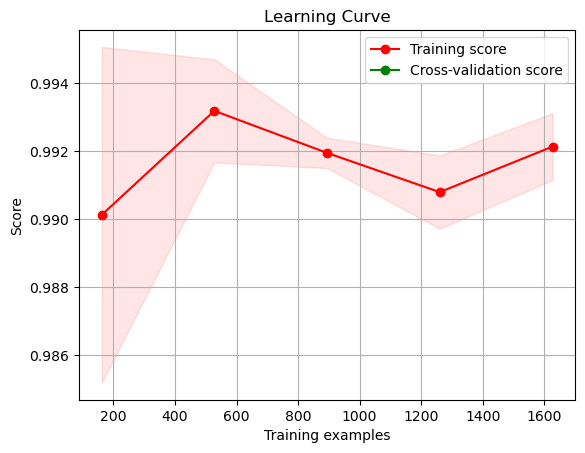

In [215]:
#plotting using learning curves for gaussian naive bayes  
sp.plot_learning_curve(cat_nb_grid,X2_train,y2_train,scoring='accuracy')

The categorical Naive bayes is giving validation quite perfect this may also be overfitting of model and leading wrong predictions 

In [216]:
## After all key observation with every model the best suited model for salary dataset is the gaussian Naive bayes giving 
## us optimal results with low bias and low variance 

In [251]:
#storing our actua and predicted values
final_preds = pd.DataFrame({'actual':y2_test,'predicted':preds_gaussian})
final_preds

,actual,predicted
19122,0,0
38941,1,1
3773,0,0
42746,1,1
22527,0,0
...,...,...
11068,1,1
34754,1,1
29786,0,0
29146,1,0


Conclusions

 1)It is simple and easy to implement and doesn't require as much training data
 
 2)It handles both continuous and discrete data and highly scalable with the number of predictors and data points.
 
 3)It is fast and can be used to make real-time predictions.
 
 4)Naive Bayes assumes that all predictors (or features) are independent, rarely happening in real life.
 
 5)This algorithm faces the 'zero-frequency problem' where it assigns zero probability to a categorical variable